In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
from sklearn import datasets, linear_model

In [62]:
field = 'IDARADO2'

## Upload WCA file


In [63]:
df_wca = pd.read_csv('/home/dasxgo/developer/rock/WCA_2.csv')
data_major = 'OIL'
data_reservoir = 'WCA'
df_wca.insert(0, 'FIELD', field) 
df_wca.insert(1, 'MAJOR', data_major)
df_wca.insert(2, 'RESERVOIR', data_reservoir)
df_wca.head()

,FIELD,MAJOR,RESERVOIR,API_UWI,TVD_FT,LateralLength_FT,ENVOperator,WellName,ProducingMonth,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL
0,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-05-01,1,31,369,256,521
1,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-06-01,2,30,9046,7205,13550
2,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-07-01,3,31,8277,9401,12466
3,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-08-01,4,31,8645,10927,13092
4,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-09-01,5,30,7093,10786,10800


## Upload WCB file

In [64]:
df_wcb = pd.read_csv('/home/dasxgo/developer/rock/WCB_2.csv')
data_major = 'OIL'
data_reservoir = 'WCB'
df_wcb.insert(0, 'FIELD', field) 
df_wcb.insert(1, 'MAJOR', data_major)
df_wcb.insert(2, 'RESERVOIR', data_reservoir)
df_wcb.head()


,FIELD,MAJOR,RESERVOIR,API_UWI,TVD_FT,LateralLength_FT,ENVOperator,WellName,ProducingMonth,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL
0,IDARADO2,OIL,WCB,42-317-42465,8796,10398,EXXON,DARK STAR UNIT 1 2103BH,2021-05-01,1,31,2960,2731,6107
1,IDARADO2,OIL,WCB,42-317-42465,8796,10398,EXXON,DARK STAR UNIT 1 2103BH,2021-06-01,2,30,22900,20793,47279
2,IDARADO2,OIL,WCB,42-317-42465,8796,10398,EXXON,DARK STAR UNIT 1 2103BH,2021-07-01,3,31,23100,25215,47742
3,IDARADO2,OIL,WCB,42-317-42465,8796,10398,EXXON,DARK STAR UNIT 1 2103BH,2021-08-01,4,31,15346,23772,31752
4,IDARADO2,OIL,WCB,42-317-42465,8796,10398,EXXON,DARK STAR UNIT 1 2103BH,2021-09-01,5,30,12285,27857,25446


## Upload LSS file

In [65]:
df_lss = pd.read_csv('/home/dasxgo/developer/rock/LSS_2.csv')
data_major = 'OIL'
data_reservoir = 'LSS'
df_lss.insert(0, 'FIELD', field) 
df_lss.insert(1, 'MAJOR', data_major)
df_lss.insert(2, 'RESERVOIR', data_reservoir)
df_lss.head()

,FIELD,MAJOR,RESERVOIR,API_UWI,TVD_FT,LateralLength_FT,ENVOperator,WellName,ProducingMonth,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL
0,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-06-01,1,30,31329,8505,75909
1,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-07-01,2,31,22055,18004,53596
2,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-08-01,3,31,18680,11996,45531
3,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-09-01,4,30,17455,9466,42671
4,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-10-01,5,31,26144,16693,64099


## **Flatflie**

In [66]:
df = pd.concat([df_lss,df_wca,df_wcb], ignore_index=True)
df['ProducingMonth'] = pd.to_datetime(df['ProducingMonth'])
df.head()

,FIELD,MAJOR,RESERVOIR,API_UWI,TVD_FT,LateralLength_FT,ENVOperator,WellName,ProducingMonth,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL
0,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-06-01,1,30,31329,8505,75909
1,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-07-01,2,31,22055,18004,53596
2,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-08-01,3,31,18680,11996,45531
3,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-09-01,4,30,17455,9466,42671
4,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-10-01,5,31,26144,16693,64099


## Data according to plan



In [68]:
well_planned = 5000
data_oil = df['LiquidsProd_BBL'] * (well_planned / df['LateralLength_FT']) * (30.4 / df['ProducingDays'])
data_gas = df['GasProd_MCF'] * (well_planned / df['LateralLength_FT']) * (30.4 / df['ProducingDays'])
data_water = df['WaterProd_BBL'] * (well_planned / df['LateralLength_FT']) * (30.4 / df['ProducingDays'])

df['OIL BBL'] = data_oil
df['GAS MCF'] = data_gas
df['WATER BBL'] = data_water

df['OIL BBL'] = np.array(df['OIL BBL'], np.int64)
df['GAS MCF'] = np.array(df['GAS MCF'], np.int64)
df['WATER BBL'] = np.array(df['WATER BBL'], np.int64)

df.head()

/home/dasxgo/mambaforge/envs/rock/lib/python3.11/site-packages/pandas/core/series.py:893: RuntimeWarning: invalid value encountered in cast
  return np.asarray(self._values, dtype)


,FIELD,MAJOR,RESERVOIR,API_UWI,TVD_FT,LateralLength_FT,ENVOperator,WellName,ProducingMonth,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL,OIL BBL,GAS MCF,WATER BBL
0,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-06-01,1,30,31329,8505,75909,15226,4133,36892
1,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-07-01,2,31,22055,18004,53596,10373,8467,25207
2,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-08-01,3,31,18680,11996,45531,8785,5642,21414
3,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-09-01,4,30,17455,9466,42671,8483,4600,20738
4,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-10-01,5,31,26144,16693,64099,12296,7851,30147


## Type of Data

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FIELD             4810 non-null   object        
 1   MAJOR             4810 non-null   object        
 2   RESERVOIR         4810 non-null   object        
 3   API_UWI           4810 non-null   object        
 4   TVD_FT            4810 non-null   int64         
 5   LateralLength_FT  4810 non-null   int64         
 6   ENVOperator       4810 non-null   object        
 7   WellName          4810 non-null   object        
 8   ProducingMonth    4810 non-null   datetime64[ns]
 9   TotalProdMonths   4810 non-null   int64         
 10  ProducingDays     4810 non-null   int64         
 11  LiquidsProd_BBL   4810 non-null   int64         
 12  GasProd_MCF       4810 non-null   int64         
 13  WaterProd_BBL     4810 non-null   int64         
 14  OIL BBL           4810 n

## **Data Cleansing**

## Check errors


In [70]:
df[df['OIL BBL'] == 0].count() + df[df['OIL BBL'] < 0].count() 


FIELD               41
MAJOR               41
RESERVOIR           41
API_UWI             41
TVD_FT              41
LateralLength_FT    41
ENVOperator         41
WellName            41
ProducingMonth      41
TotalProdMonths     41
ProducingDays       41
LiquidsProd_BBL     41
GasProd_MCF         41
WaterProd_BBL       41
OIL BBL             41
GAS MCF             41
WATER BBL           41
dtype: int64

In [71]:
df[df['GAS MCF'] == 0].count() + df[df['GAS MCF'] < 0].count()

FIELD               82
MAJOR               82
RESERVOIR           82
API_UWI             82
TVD_FT              82
LateralLength_FT    82
ENVOperator         82
WellName            82
ProducingMonth      82
TotalProdMonths     82
ProducingDays       82
LiquidsProd_BBL     82
GasProd_MCF         82
WaterProd_BBL       82
OIL BBL             82
GAS MCF             82
WATER BBL           82
dtype: int64

In [72]:
df[df['WATER BBL'] == 0].count() + df[df['WATER BBL'] < 0].count()


FIELD               197
MAJOR               197
RESERVOIR           197
API_UWI             197
TVD_FT              197
LateralLength_FT    197
ENVOperator         197
WellName            197
ProducingMonth      197
TotalProdMonths     197
ProducingDays       197
LiquidsProd_BBL     197
GasProd_MCF         197
WaterProd_BBL       197
OIL BBL             197
GAS MCF             197
WATER BBL           197
dtype: int64

## Cleanning Data


In [73]:
df.drop(df[(df['OIL BBL'] == 0)].index, inplace = True) 
df.drop(df[(df['OIL BBL'] < 0)].index, inplace = True)

df.drop(df[(df['GAS MCF'] == 0)].index, inplace = True) 
df.drop(df[(df['GAS MCF'] < 0)].index, inplace = True)

df.drop(df[(df['WATER BBL'] == 0)].index, inplace = True) 
df.drop(df[(df['WATER BBL'] < 0)].index, inplace = True)


## Check cleanning

In [74]:
df[df['OIL BBL']== 0].count() + df[df['OIL BBL'] < 0].count()

FIELD               0
MAJOR               0
RESERVOIR           0
API_UWI             0
TVD_FT              0
LateralLength_FT    0
ENVOperator         0
WellName            0
ProducingMonth      0
TotalProdMonths     0
ProducingDays       0
LiquidsProd_BBL     0
GasProd_MCF         0
WaterProd_BBL       0
OIL BBL             0
GAS MCF             0
WATER BBL           0
dtype: int64

In [75]:
df[df['GAS MCF'] == 0].count() + df[df['GAS MCF'] < 0].count()

FIELD               0
MAJOR               0
RESERVOIR           0
API_UWI             0
TVD_FT              0
LateralLength_FT    0
ENVOperator         0
WellName            0
ProducingMonth      0
TotalProdMonths     0
ProducingDays       0
LiquidsProd_BBL     0
GasProd_MCF         0
WaterProd_BBL       0
OIL BBL             0
GAS MCF             0
WATER BBL           0
dtype: int64

In [76]:
df[df['WATER BBL'] == 0].count() + df[df['WATER BBL'] < 0].count()

FIELD               0
MAJOR               0
RESERVOIR           0
API_UWI             0
TVD_FT              0
LateralLength_FT    0
ENVOperator         0
WellName            0
ProducingMonth      0
TotalProdMonths     0
ProducingDays       0
LiquidsProd_BBL     0
GasProd_MCF         0
WaterProd_BBL       0
OIL BBL             0
GAS MCF             0
WATER BBL           0
dtype: int64

## **Check Fatflie / Data Okay**

In [77]:
df.head()

,FIELD,MAJOR,RESERVOIR,API_UWI,TVD_FT,LateralLength_FT,ENVOperator,WellName,ProducingMonth,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL,OIL BBL,GAS MCF,WATER BBL
0,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-06-01,1,30,31329,8505,75909,15226,4133,36892
1,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-07-01,2,31,22055,18004,53596,10373,8467,25207
2,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-08-01,3,31,18680,11996,45531,8785,5642,21414
3,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-09-01,4,30,17455,9466,42671,8483,4600,20738
4,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-10-01,5,31,26144,16693,64099,12296,7851,30147


## Normalization 

In [78]:
df_lss = df[df['RESERVOIR'] == "LSS"]

In [79]:
df_lss['OIL BBL'].describe()

count     1578.000000
mean      3538.261090
std       4009.696064
min          3.000000
25%        853.250000
50%       2080.000000
75%       4546.000000
max      23555.000000
Name: OIL BBL, dtype: float64

## Oil average curve without normalizing

/tmp/ipykernel_745/885162121.py:11: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.axis([0, 70, 0,100000])


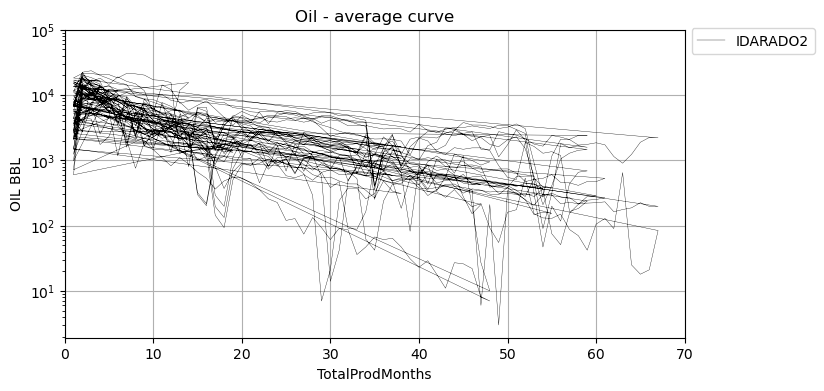

In [80]:
x = "TotalProdMonths"
y = "OIL BBL"

plt.figure(figsize=(8,4))
plt.plot(x,y, label=field, data=df_lss, linewidth=0.25, color="black")
plt.title("Oil - average curve")
plt.xlabel("TotalProdMonths")
plt.ylabel("OIL BBL")
plt.yscale('log')
plt.grid(True)
plt.axis([0, 70, 0,100000])
plt.legend(loc="lower left", bbox_to_anchor=(1,0.9))

plt.show()

## Normalization method min-max

/tmp/ipykernel_745/3443978502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lss['OIL BBL'] = (df_lss['OIL BBL']-df_lss['OIL BBL'].min()) / (df_lss['OIL BBL'].max()-df_lss['OIL BBL'].min())


(array([226., 196., 174., 169., 154., 106.,  96., 113., 103., 241.]),
 array([0.        , 0.09999092, 0.19998184, 0.29997276, 0.39996368,
        0.4999546 , 0.59994552, 0.69993644, 0.79992736, 0.89991828,
        0.9999092 ]),
 <BarContainer object of 10 artists>)

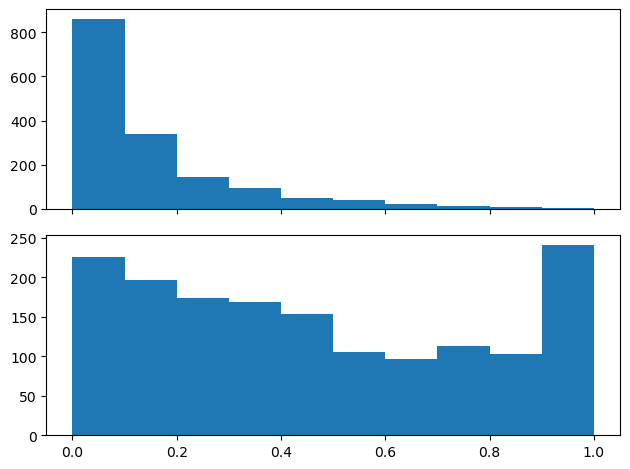

In [104]:
df_lss['OIL BBL'] = (df_lss['OIL BBL']-df_lss['OIL BBL'].min()) / (df_lss['OIL BBL'].max()-df_lss['OIL BBL'].min())
p = 0.2

fig, axs = plt.subplots(2, 1, sharex=True, tight_layout=True)

axs[0].hist(df_lss['OIL BBL'])
axs[1].hist(df_lss['OIL BBL'].apply(lambda x : np.tanh(x/p)))


<AxesSubplot: xlabel='OIL BBL'>

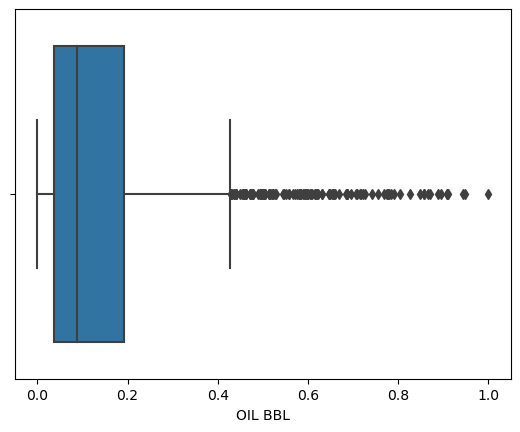

In [98]:
sns.boxplot(x=df_lss['OIL BBL'])

In [105]:
df_lss['OIL BBL'].describe()

count    1578.000000
mean        0.150104
std         0.170249
min         0.000000
25%         0.036101
50%         0.088188
75%         0.192892
max         1.000000
Name: OIL BBL, dtype: float64

## Oil Average curve Visualization

/tmp/ipykernel_745/1077488998.py:12: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.axis([0, 70, 0,1])


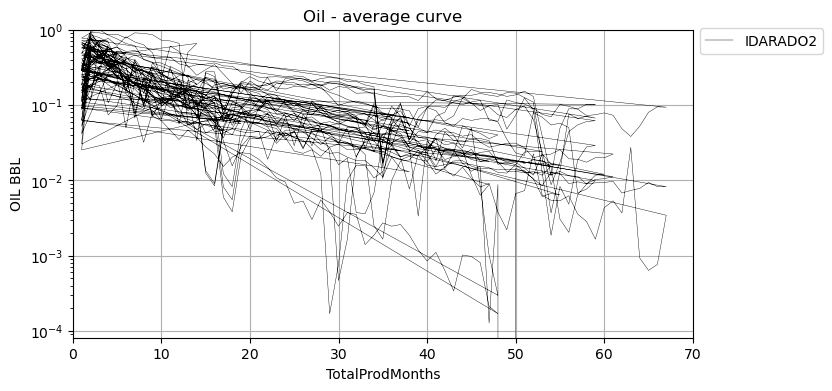

In [106]:
data = df_lss
x = "TotalProdMonths"
y = "OIL BBL"

plt.figure(figsize=(8,4))
plt.plot(x,y, label=field, data=data, linewidth=0.30, color="black")
plt.title("Oil - average curve")
plt.xlabel("TotalProdMonths")
plt.ylabel("OIL BBL")
plt.yscale('log')
plt.grid(True)
plt.axis([0, 70, 0,1])
plt.legend(loc="lower left", bbox_to_anchor=(1,0.9))

plt.show()